In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline
sns.set(style="whitegrid")

### Reading Data

In [132]:
df = pd.read_csv('../data/raw/telco.csv')
df.columns = df.columns.str.upper() # convert the columns to uppercase
df.head()

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,...,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [133]:
## drop customer ID

df.drop(['CUSTOMERID'], axis=1, inplace=True)

## change date type of TOTALCHARGES

df['TOTALCHARGES'] = pd.to_numeric(df['TOTALCHARGES'], errors='coerce')

### Data at a glance

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GENDER            7043 non-null   object 
 1   SENIORCITIZEN     7043 non-null   int64  
 2   PARTNER           7043 non-null   object 
 3   DEPENDENTS        7043 non-null   object 
 4   TENURE            7043 non-null   int64  
 5   PHONESERVICE      7043 non-null   object 
 6   MULTIPLELINES     7043 non-null   object 
 7   INTERNETSERVICE   7043 non-null   object 
 8   ONLINESECURITY    7043 non-null   object 
 9   ONLINEBACKUP      7043 non-null   object 
 10  DEVICEPROTECTION  7043 non-null   object 
 11  TECHSUPPORT       7043 non-null   object 
 12  STREAMINGTV       7043 non-null   object 
 13  STREAMINGMOVIES   7043 non-null   object 
 14  CONTRACT          7043 non-null   object 
 15  PAPERLESSBILLING  7043 non-null   object 
 16  PAYMENTMETHOD     7043 non-null   object 


In [135]:
df['SENIORCITIZEN'] = df['SENIORCITIZEN'].map({1: 'Yes', 0: 'No'})

In [136]:
cols = df.columns.to_list()
cols

['GENDER',
 'SENIORCITIZEN',
 'PARTNER',
 'DEPENDENTS',
 'TENURE',
 'PHONESERVICE',
 'MULTIPLELINES',
 'INTERNETSERVICE',
 'ONLINESECURITY',
 'ONLINEBACKUP',
 'DEVICEPROTECTION',
 'TECHSUPPORT',
 'STREAMINGTV',
 'STREAMINGMOVIES',
 'CONTRACT',
 'PAPERLESSBILLING',
 'PAYMENTMETHOD',
 'MONTHLYCHARGES',
 'TOTALCHARGES',
 'CHURN']

In [137]:
cat_cols = [col for col in cols if df[col].dtype == 'object']
num_cols = [col for col in cols if df[col].dtype != 'object']

In [138]:
for col in df.columns:
    print(f'{len(df[col].unique())} Unique Values in {col}:')
    print(df[col].unique())
    print('=======================================')

2 Unique Values in GENDER:
['Female' 'Male']
2 Unique Values in SENIORCITIZEN:
['No' 'Yes']
2 Unique Values in PARTNER:
['Yes' 'No']
2 Unique Values in DEPENDENTS:
['No' 'Yes']
73 Unique Values in TENURE:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
2 Unique Values in PHONESERVICE:
['No' 'Yes']
3 Unique Values in MULTIPLELINES:
['No phone service' 'No' 'Yes']
3 Unique Values in INTERNETSERVICE:
['DSL' 'Fiber optic' 'No']
3 Unique Values in ONLINESECURITY:
['No' 'Yes' 'No internet service']
3 Unique Values in ONLINEBACKUP:
['Yes' 'No' 'No internet service']
3 Unique Values in DEVICEPROTECTION:
['No' 'Yes' 'No internet service']
3 Unique Values in TECHSUPPORT:
['No' 'Yes' 'No internet service']
3 Unique Values in STREAMINGTV:
['No' 'Yes' 'No internet service']
3 Unique Values in STREAMINGMOVIES:
['No' 'Yes' 'No 

In [139]:
df.describe()

,TENURE,MONTHLYCHARGES,TOTALCHARGES
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [140]:
df.isna().sum()

GENDER               0
SENIORCITIZEN        0
PARTNER              0
DEPENDENTS           0
TENURE               0
PHONESERVICE         0
MULTIPLELINES        0
INTERNETSERVICE      0
ONLINESECURITY       0
ONLINEBACKUP         0
DEVICEPROTECTION     0
TECHSUPPORT          0
STREAMINGTV          0
STREAMINGMOVIES      0
CONTRACT             0
PAPERLESSBILLING     0
PAYMENTMETHOD        0
MONTHLYCHARGES       0
TOTALCHARGES        11
CHURN                0
dtype: int64

In [141]:
df.duplicated().sum()

np.int64(22)

### EDA

### Do long-tenure customers churn less?

In [142]:
grouped_by_contract = df.groupby('CONTRACT')['CHURN'].agg(
    total_customers='count',
    churned_customers=lambda x: (x == 'Yes').sum(),
)
grouped_by_contract['churn%'] = grouped_by_contract['churned_customers'] / grouped_by_contract['total_customers'] * 100
print(grouped_by_contract)

                total_customers  churned_customers     churn%
CONTRACT                                                     
Month-to-month             3875               1655  42.709677
One year                   1473                166  11.269518
Two year                   1695                 48   2.831858


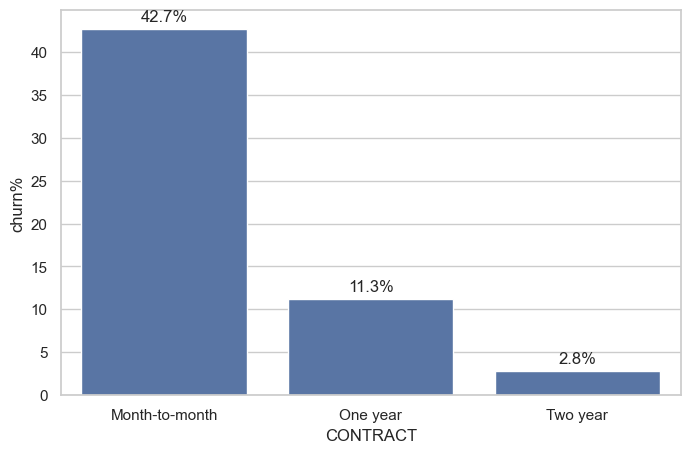

In [143]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=grouped_by_contract,
            x = 'CONTRACT',
            y = 'churn%',
            )

for container in ax.containers:
    ax.bar_label(container=container, fmt='%.1f%%', padding=3)

plt.show()

### Does payment method impact churn?

In [144]:
summary = df.groupby('PAYMENTMETHOD')['CHURN'].agg(
    total = 'count',
    churned = lambda x: (x=='Yes').sum(),
    not_churned = lambda x: (x=='No').sum()
)
summary['CHURN %'] = round(((summary['churned'] / (summary['churned'] + summary['not_churned'])) * 100), 2)
print(summary)

                           total  churned  not_churned  CHURN %
PAYMENTMETHOD                                                  
Bank transfer (automatic)   1544      258         1286    16.71
Credit card (automatic)     1522      232         1290    15.24
Electronic check            2365     1071         1294    45.29
Mailed check                1612      308         1304    19.11


<Axes: xlabel='CHURN %', ylabel='PAYMENTMETHOD'>

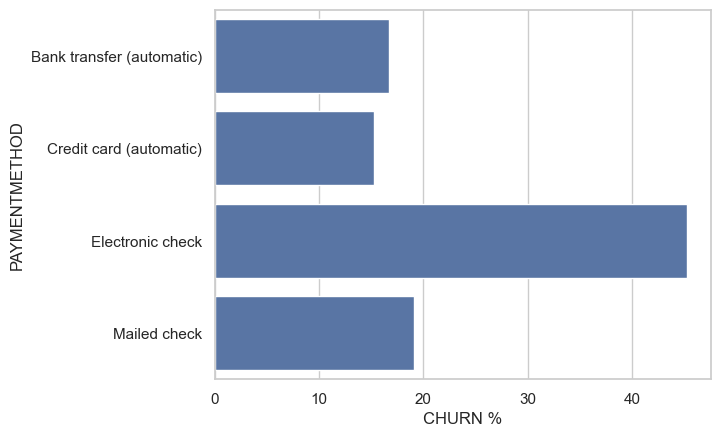

In [145]:
sns.barplot(summary, y='PAYMENTMETHOD', x='CHURN %')

### Are fiber optic users more likely to churn than DSL?

In [146]:
df['INTERNETSERVICE'].value_counts()

INTERNETSERVICE
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [147]:
summary = df.groupby('INTERNETSERVICE')['CHURN'].agg(
    total = 'count',
    churned = lambda x: (x=='Yes').sum()
)

summary['CHURN %'] = round((summary['churned'] / summary['total'] * 100), 2)

summary

,total,churned,CHURN %
INTERNETSERVICE,,,
DSL,2421,459,18.96
Fiber optic,3096,1297,41.89
No,1526,113,7.40


<Axes: xlabel='INTERNETSERVICE', ylabel='count'>

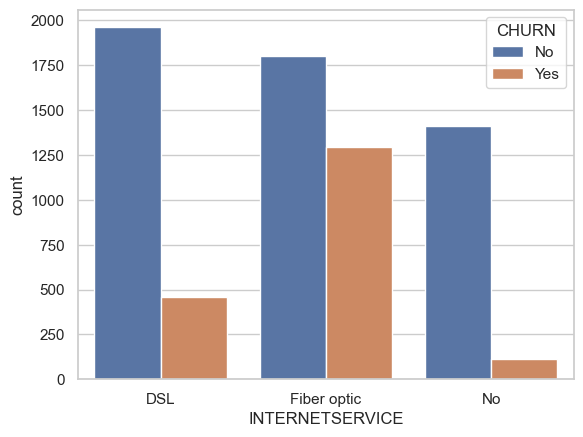

In [148]:
sns.countplot(data = df, x = 'INTERNETSERVICE', hue = 'CHURN')

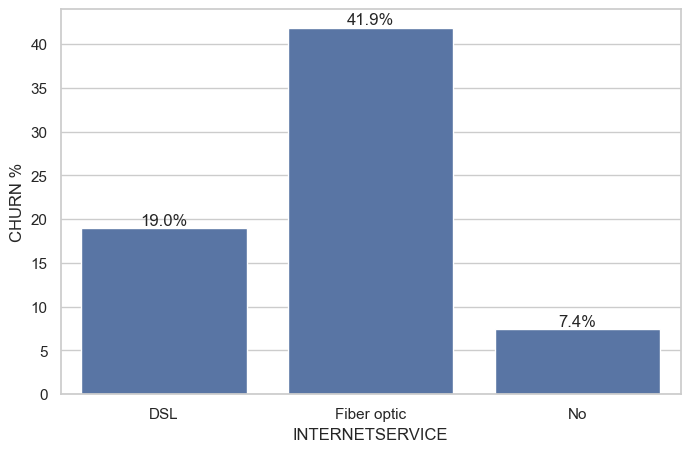

In [149]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=summary, x='INTERNETSERVICE', y='CHURN %')

for container in ax.containers:
    ax.bar_label(container, fmt = '%.1f%%')

plt.show()

### Are monthly charges predictive of churn?

In [150]:
df[['MONTHLYCHARGES', 'CHURN']]

,MONTHLYCHARGES,CHURN
0,29.85,No
1,56.95,No
2,53.85,Yes
3,42.30,No
4,70.70,Yes
...,...,...
7038,84.80,No
7039,103.20,No
7040,29.60,No
7041,74.40,Yes


In [151]:
df['MONTHLYCHARGES'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MONTHLYCHARGES, dtype: float64

In [152]:
bins = [0, 20, 40, 60, 80, 100, 120]
df['MONTHLYCHARGE_BRACKET'] = pd.cut(df['MONTHLYCHARGES'], bins, right=True)

In [153]:
df[['MONTHLYCHARGE_BRACKET', 'CHURN']]

,MONTHLYCHARGE_BRACKET,CHURN
0,"(20, 40]",No
1,"(40, 60]",No
2,"(40, 60]",Yes
3,"(40, 60]",No
4,"(60, 80]",Yes
...,...,...
7038,"(80, 100]",No
7039,"(100, 120]",No
7040,"(20, 40]",No
7041,"(60, 80]",Yes


<Axes: xlabel='MONTHLYCHARGE_BRACKET', ylabel='count'>

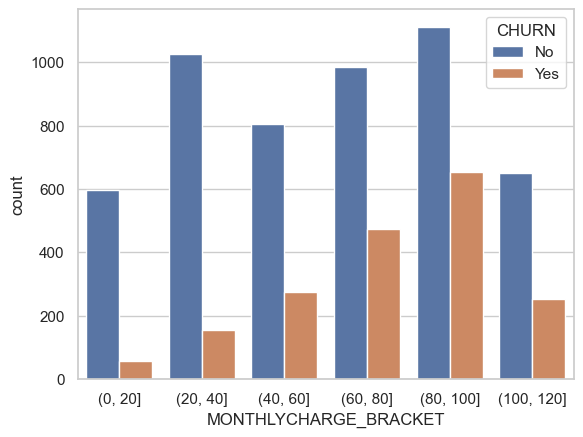

In [154]:
sns.countplot(data=df, x='MONTHLYCHARGE_BRACKET', hue='CHURN')

### What’s the churn rate by contract type?

In [155]:
grouped_by_contract = df.groupby('CONTRACT')['CHURN'].agg(
    total_customers='count',
    churned_customers=lambda x: (x == 'Yes').sum(),
)
grouped_by_contract['churn%'] = grouped_by_contract['churned_customers'] / grouped_by_contract['total_customers'] * 100
print(grouped_by_contract)

                total_customers  churned_customers     churn%
CONTRACT                                                     
Month-to-month             3875               1655  42.709677
One year                   1473                166  11.269518
Two year                   1695                 48   2.831858


### Is PaperlessBilling riskier?

<Axes: xlabel='PAPERLESSBILLING', ylabel='count'>

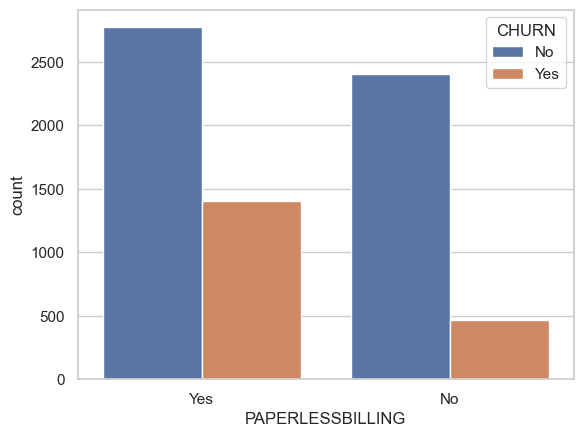

In [156]:
sns.countplot(data=df, x = 'PAPERLESSBILLING', hue='CHURN')

In [157]:
summary = df.groupby('PAPERLESSBILLING')['CHURN'].agg(
    total = 'count',
    churned = lambda x: (x == 'Yes').sum()
)
summary['CHURN %'] = round((summary['churned'] / summary['total'] * 100), 2)

summary[['total', 'CHURN %']]

,total,CHURN %
PAPERLESSBILLING,,
No,2872,16.33
Yes,4171,33.57


### Are seniors or customers without dependents more likely to churn?

In [158]:
df[['SENIORCITIZEN', 'DEPENDENTS', 'CHURN']]

,SENIORCITIZEN,DEPENDENTS,CHURN
0,No,No,No
1,No,No,No
2,No,No,Yes
3,No,No,No
4,No,No,Yes
...,...,...,...
7038,No,Yes,No
7039,No,Yes,No
7040,No,Yes,No
7041,Yes,No,Yes


In [159]:
summary = df.groupby(['SENIORCITIZEN', 'DEPENDENTS'])['CHURN'].agg(
    TOTAL = 'count',
    CHURNED = lambda x: (x=='Yes').sum()
)

summary['CHURNED %'] = round((summary['CHURNED'] / summary['TOTAL'] * 100), 2)
summary

TOTAL  CHURNED  CHURNED %
SENIORCITIZEN DEPENDENTS                           
No            No           3882     1089      28.05
              Yes          2019      304      15.06
Yes           No           1051      454      43.20
              Yes            91       22      24.18

<Axes: xlabel='SENIORCITIZEN', ylabel='CHURNED %'>

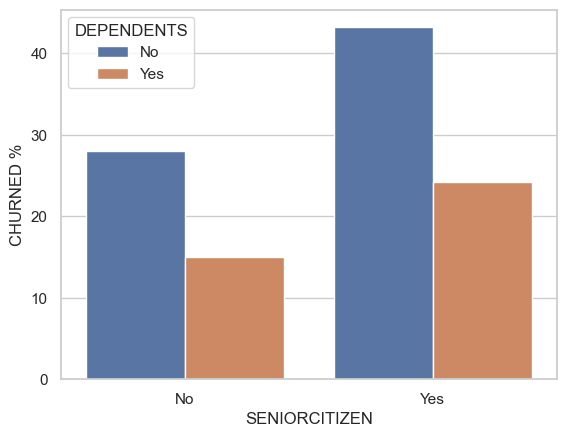

In [160]:
sns.barplot(data = summary, x='SENIORCITIZEN', y='CHURNED %', hue='DEPENDENTS')

### Which services are most associated with churn?

In [161]:
services = ['PHONESERVICE',
 'MULTIPLELINES',
 'INTERNETSERVICE',
 'ONLINESECURITY',
 'ONLINEBACKUP',
 'DEVICEPROTECTION',
 'TECHSUPPORT',
 'STREAMINGTV',
 'STREAMINGMOVIES',]

In [162]:
for service in services:
    print(f'Churns in {service}:')

    summary = df.groupby(service)['CHURN'].agg(
        churned = lambda x: (x=='Yes').sum()
    )
    print(summary)
    print(3 * "=============================")

Churns in PHONESERVICE:
              churned
PHONESERVICE         
No                170
Yes              1699
Churns in MULTIPLELINES:
                  churned
MULTIPLELINES            
No                    849
No phone service      170
Yes                   850
Churns in INTERNETSERVICE:
                 churned
INTERNETSERVICE         
DSL                  459
Fiber optic         1297
No                   113
Churns in ONLINESECURITY:
                     churned
ONLINESECURITY              
No                      1461
No internet service      113
Yes                      295
Churns in ONLINEBACKUP:
                     churned
ONLINEBACKUP                
No                      1233
No internet service      113
Yes                      523
Churns in DEVICEPROTECTION:
                     churned
DEVICEPROTECTION            
No                      1211
No internet service      113
Yes                      545
Churns in TECHSUPPORT:
                     churned
TECHSUPPORT     

Not using services like PHONE SERVICE, ONLINE BACKUP, DEVICE PROTECTION, TECH SUPPORT etc are high indicators of churn.

#### Checking relationship between 'STREAMINGTV' & 'STREAMINGMOVIES'

In [163]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df['STREAMINGMOVIES'], df['STREAMINGTV'])

test = chi2_contingency(table)

print(f'p_value: {test[1]}')
if test[1] < 0.5:
    print('Null hypothesis can be rejected, the two variables are not independent')
else:
    print('the two variables are independent of each other')

p_value: 0.0
Null hypothesis can be rejected, the two variables are not independent


### EDA CONCLUSION

- Customers with Short tenure (month-to-month) are more likely to churn. 
- Not using services like PHONE SERVICE, ONLINE BACKUP, DEVICE PROTECTION, TECH SUPPORT etc are high indicators of churn.
- Customers using 'electronic check' as payment method are more prone to churn.
- Fibre optic users are more likely to churn than DSL.
- There is a stead increase in churn rate as monthly charges increase upto $100. After that, churn rate gets down significantly. 
- Nearly 42% of customers with monthly payment contract churned. Number steeped down to 2% only when customer using two-year cycle.
- Paperless billing appears to be riskly, with nearly 33% churn rate.
- Very high churn rate (43%) in senior citizens with no dependents.
- 'STREAMINGTV' & 'STREAMINGMOVIES' are statistically dependent on one another.

### FEATURE ENGINEERING

- Create new features
- Encode categorical variables
- Normalize numerical values

#### New Features

In [164]:
df['CHARGE_PER_TENURE'] = df['TOTALCHARGES'] / (df['TENURE'] + 1)

df[['TENURE', 'TOTALCHARGES', 'MONTHLYCHARGES', 'CHARGE_PER_TENURE']].describe()

,TENURE,TOTALCHARGES,MONTHLYCHARGES,CHARGE_PER_TENURE
count,7043.000000,7032.000000,7043.000000,7032.000000
mean,32.371149,2283.300441,64.761692,59.083067
std,24.559481,2266.771362,30.090047,30.514438
min,0.000000,18.800000,18.250000,9.183333
25%,9.000000,401.450000,35.500000,26.225944
50%,29.000000,1397.475000,70.350000,61.070387
75%,55.000000,3794.737500,89.850000,84.877538
max,72.000000,8684.800000,118.750000,118.969863


In [165]:
df[['TENURE', 'TOTALCHARGES', 'CHARGE_PER_TENURE']].corr()

,TENURE,TOTALCHARGES,CHARGE_PER_TENURE
TENURE,1.000000,0.825880,0.412135
TOTALCHARGES,0.825880,1.000000,0.764489
CHARGE_PER_TENURE,0.412135,0.764489,1.000000


In [166]:
df2 = df[['TENURE', 'TOTALCHARGES', 'CHARGE_PER_TENURE', 'CHURN']].dropna()

In [167]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

X = df2[['TENURE', 'TOTALCHARGES', 'CHARGE_PER_TENURE']]
X = add_constant(X)

vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


             Feature        VIF
0              const  11.317645
1             TENURE   4.944313
2       TOTALCHARGES   9.877109
3  CHARGE_PER_TENURE   3.782647


In [168]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression  # or other model

X1 = df2[['TENURE', 'TOTALCHARGES']]
X2 = df2[['CHARGE_PER_TENURE']]
X3 = df2[['TENURE', 'TOTALCHARGES', 'CHARGE_PER_TENURE']]
y = df2['CHURN'].map({'Yes': 1, 'No': 0})

model = LogisticRegression(max_iter=1000)

print("Base model:", cross_val_score(model, X1, y, cv=5).mean())
print("Derived only:", cross_val_score(model, X2, y, cv=5).mean())
print("All features:", cross_val_score(model, X3, y, cv=5).mean())


Base model: 0.7699094448505288
Derived only: 0.7342150252598014
All features: 0.772182169825532


#### Derived-only model is decent but weaker:

- Accuracy: 0.734
- Meaning: CHARGE_PER_TENURE captures a large portion, but not all of the signal from the original features.
- This supports the idea that it's informative, but not a perfect substitute.

In [169]:
# dropping 'CHARGE_PER_TENURE'

df = df.drop(columns=['CHARGE_PER_TENURE'])

In [170]:
df.columns

Index(['GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS', 'TENURE',
       'PHONESERVICE', 'MULTIPLELINES', 'INTERNETSERVICE', 'ONLINESECURITY',
       'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT', 'STREAMINGTV',
       'STREAMINGMOVIES', 'CONTRACT', 'PAPERLESSBILLING', 'PAYMENTMETHOD',
       'MONTHLYCHARGES', 'TOTALCHARGES', 'CHURN', 'MONTHLYCHARGE_BRACKET'],
      dtype='object')

In [171]:
# new column: IS_STREAMING
# If user is streaming either of the service (TV or MOVIES), IS_STREAMING=True

df['IS_STREAMING'] = ((df['STREAMINGMOVIES'] == 'Yes') | (df['STREAMINGTV'] == 'Yes')).astype(int)

In [172]:
count = 0
unmatched_index = []

for i in range(len(df)):
    if df['STREAMINGTV'][i] == df['STREAMINGMOVIES'][i]:
        count+=1
    else: 
        unmatched_index.append(i)

print(f'total matches: {count}')
print(f'total unmatched: {len(unmatched_index)}')

total matches: 5484
total unmatched: 1559


In [173]:
df3 = df[['STREAMINGTV', 'STREAMINGMOVIES', 'IS_STREAMING', 'CHURN']]
cols = list(df3.columns)

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_df3 = encoder.fit_transform(df3)

df3 = pd.DataFrame(encoded_df3, columns=encoder.get_feature_names_out(cols))
df3


,STREAMINGTV_No internet service,STREAMINGTV_Yes,STREAMINGMOVIES_No internet service,STREAMINGMOVIES_Yes,IS_STREAMING_1,CHURN_Yes
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
7038,0.0,1.0,0.0,1.0,1.0,0.0
7039,0.0,1.0,0.0,1.0,1.0,0.0
7040,0.0,0.0,0.0,0.0,0.0,0.0
7041,0.0,0.0,0.0,0.0,0.0,1.0


In [174]:
model2 = LogisticRegression(max_iter=1000)

X1 = df3[['STREAMINGTV_No internet service', 'STREAMINGTV_Yes',
       'STREAMINGMOVIES_No internet service', 'STREAMINGMOVIES_Yes', 'CHURN_Yes']]
X2 = df3[['IS_STREAMING_1', 'CHURN_Yes']]
X3 = df3[['STREAMINGTV_No internet service', 'STREAMINGTV_Yes',
       'STREAMINGMOVIES_No internet service', 'STREAMINGMOVIES_Yes',
       'IS_STREAMING_1', 'CHURN_Yes']]
y = df3['CHURN_Yes']

print("Base model:", cross_val_score(model2, X1, y, cv=5).mean())
print("Derived only:", cross_val_score(model2, X2, y, cv=5).mean())
print("All features:", cross_val_score(model2, X3, y, cv=5).mean())

Base model: 1.0
Derived only: 1.0
All features: 1.0


We can keep 'IS_STREAMING' instead of 'STREAMINGTV' and "STREAMINGMOVIES'

In [175]:
df = df.drop(columns=['STREAMINGTV', 'STREAMINGMOVIES', 'MONTHLYCHARGE_BRACKET'])

In [176]:
df.columns

Index(['GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS', 'TENURE',
       'PHONESERVICE', 'MULTIPLELINES', 'INTERNETSERVICE', 'ONLINESECURITY',
       'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT', 'CONTRACT',
       'PAPERLESSBILLING', 'PAYMENTMETHOD', 'MONTHLYCHARGES', 'TOTALCHARGES',
       'CHURN', 'IS_STREAMING'],
      dtype='object')

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GENDER            7043 non-null   object 
 1   SENIORCITIZEN     7043 non-null   object 
 2   PARTNER           7043 non-null   object 
 3   DEPENDENTS        7043 non-null   object 
 4   TENURE            7043 non-null   int64  
 5   PHONESERVICE      7043 non-null   object 
 6   MULTIPLELINES     7043 non-null   object 
 7   INTERNETSERVICE   7043 non-null   object 
 8   ONLINESECURITY    7043 non-null   object 
 9   ONLINEBACKUP      7043 non-null   object 
 10  DEVICEPROTECTION  7043 non-null   object 
 11  TECHSUPPORT       7043 non-null   object 
 12  CONTRACT          7043 non-null   object 
 13  PAPERLESSBILLING  7043 non-null   object 
 14  PAYMENTMETHOD     7043 non-null   object 
 15  MONTHLYCHARGES    7043 non-null   float64
 16  TOTALCHARGES      7032 non-null   float64
